In [1]:
import pandas as pd
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#merging processed file into raw merge file for further processing
here = Path.cwd()
root = next(p for p in [here, *here.parents] if (p / "data" / "raw").exists())

#creating 2 columns to identify source file and if ios or android
ios_raw = pd.read_csv(root / "data" / "raw" / "ios_turns.csv", header=0)
ios_raw = ios_raw.assign(source_file="ios_turns.csv", is_ios=1)
android_raw = pd.read_csv(root / "data" / "raw" / "android_turns.csv", header=0)
android_raw = android_raw.assign(source_file="android_turns.csv", is_ios=0)

df = pd.concat([ios_raw, android_raw], ignore_index=True)
df = df[["is_ios", "source_file"] + [c for c in df.columns if c not in ["is_ios", "source_file"]]]
df.to_csv(root / "data" / "raw" / "merged_turns.csv", index=False)

In [3]:
df_raw_size = df.shape[0]
df.shape

(62381, 36)

In [4]:
#add feature col to show if turn is from ios or android
df.columns.to_list()

['is_ios',
 'source_file',
 'init_time',
 'eventAction',
 'payloadCreation',
 'eventStart',
 'eventEnd',
 'eventType',
 'eventSampleSpeed',
 'eventDurationSeconds',
 'eventMilesDriven',
 'eventStartLatitude',
 'eventStartLongitude',
 'eventEndLatitude',
 'eventEndLongitude',
 'eventSensorDetectionMthd',
 'eventGPSSignalStrength',
 'eventStartSpeed',
 'eventEndSpeed',
 'eventSpeedChange',
 'memsMedianLateralAccel',
 'memsP75LateralAccel',
 'memsP95LateralAccel',
 'memsMedianHorizontalNorm',
 'memsP75HorizontalNorm',
 'memsP95HorizontalNorm',
 'gpsMedianLateralAccel',
 'gpsP75LateralAccel',
 'gpsP95LateralAccel',
 'bearing_angular_change_per_second',
 'gyro_angular_change_per_second',
 'bearingAngleChange',
 'gyroAngleChange',
 'mems_radius',
 'gps_radius',
 'validity_mean']

In [5]:
# Dropping irrelevent features (explanation in Notion)
df = df.drop(
    ['eventAction', 'eventSpeedChange', 'payloadCreation',
     'validity_mean', 'init_time', 'eventStart', 'eventEnd', 'eventStartLatitude',
     'eventStartLongitude', 'eventEndLatitude', 'eventEndLongitude'],
    axis=1
)

df.columns.to_list()

['is_ios',
 'source_file',
 'eventType',
 'eventSampleSpeed',
 'eventDurationSeconds',
 'eventMilesDriven',
 'eventSensorDetectionMthd',
 'eventGPSSignalStrength',
 'eventStartSpeed',
 'eventEndSpeed',
 'memsMedianLateralAccel',
 'memsP75LateralAccel',
 'memsP95LateralAccel',
 'memsMedianHorizontalNorm',
 'memsP75HorizontalNorm',
 'memsP95HorizontalNorm',
 'gpsMedianLateralAccel',
 'gpsP75LateralAccel',
 'gpsP95LateralAccel',
 'bearing_angular_change_per_second',
 'gyro_angular_change_per_second',
 'bearingAngleChange',
 'gyroAngleChange',
 'mems_radius',
 'gps_radius']

In [6]:
df.head(-1)

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,...,memsP95HorizontalNorm,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius
0,1,ios_turns.csv,4.0,8.553064,5.321719,0.014196,2.0,5.384603,8.536157,9.551594,...,1.619349,0.917817,1.414616,1.659606,14.507535,17.503620,72.763930,93.844490,5.143511,20.190279
1,1,ios_turns.csv,4.0,9.360758,4.884875,0.012575,2.0,5.895552,9.034532,10.596797,...,1.440432,0.298834,0.323955,2.006506,6.688964,7.615370,28.435398,37.502575,21.282076,56.273140
2,1,ios_turns.csv,5.0,10.681455,8.657750,0.021795,2.0,5.291993,11.082506,10.390737,...,2.017049,0.404701,0.639127,0.752962,4.451903,6.722845,42.455890,58.471710,61.868423,60.049355
3,1,ios_turns.csv,5.0,10.399240,7.823751,0.016130,2.0,4.910240,15.013917,8.630282,...,1.996034,0.000000,0.135585,6.447024,12.498045,12.015339,97.785550,94.482200,11.925367,inf
4,1,ios_turns.csv,4.0,8.345368,7.148625,0.017785,2.0,4.965302,6.963474,9.905923,...,1.593058,0.908760,0.968915,1.698010,10.938344,11.460243,35.474804,82.380120,8.483684,16.327477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62375,0,android_turns.csv,4.0,14.871923,5.872625,0.020761,2.0,9.438776,15.345408,18.119210,...,2.423678,1.880795,1.999884,2.212494,14.320681,15.141905,81.802050,89.523560,15.933072,23.576818
62376,0,android_turns.csv,5.0,9.467849,4.166313,0.007777,2.0,13.010204,10.961006,8.589849,...,2.505109,1.704713,1.969830,1.969830,19.057620,21.114077,86.501810,88.805630,10.805734,9.853947
62377,0,android_turns.csv,4.0,14.343257,5.317000,0.015809,2.0,10.204082,7.270055,20.400892,...,2.525413,1.894120,2.858092,2.896226,14.444234,16.300097,83.702620,87.314384,16.627410,21.766329
62378,0,android_turns.csv,5.0,28.717833,4.404469,0.029955,1.0,19.387754,28.319658,28.588089,...,1.822437,1.538083,1.762072,1.793784,6.606924,7.247447,33.200780,32.208733,19.472000,109.196080


In [7]:
df.groupby("source_file")["eventGPSSignalStrength"].describe()

,count,mean,std,min,25%,50%,75%,max
source_file,,,,,,,,
android_turns.csv,1287.0,11.130416,23.344923,0.590333,2.805208,4.229379,10.969387,293.87756
ios_turns.csv,61094.0,6.818543,8.378248,2.000000,4.740406,4.756594,7.059539,477.78418


/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_64646/3344822299.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


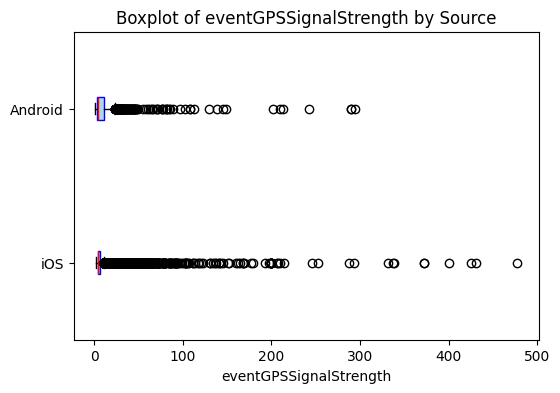

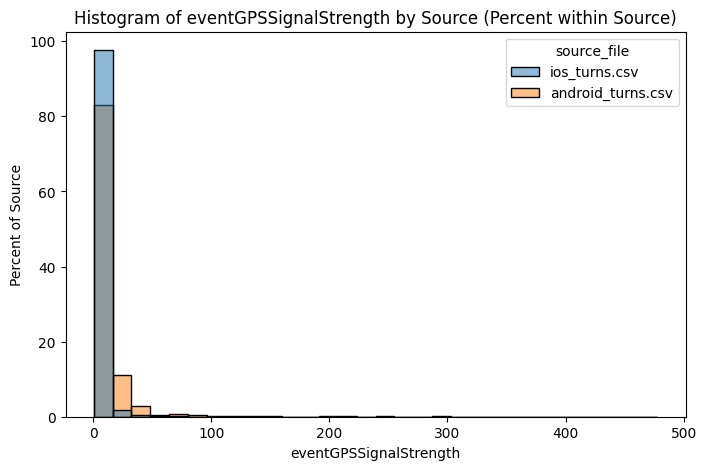

In [8]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['eventGPSSignalStrength']
android_data = df[df['is_ios'] == 0]['eventGPSSignalStrength']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of eventGPSSignalStrength by Source")
plt.xlabel("eventGPSSignalStrength")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="eventGPSSignalStrength", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of eventGPSSignalStrength by Source (Percent within Source)")
plt.xlabel("eventGPSSignalStrength")
plt.ylabel("Percent of Source")
plt.show()

/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_64646/3435304045.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(group_col, group_keys=False).apply(filter_group)
/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_64646/3435304045.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


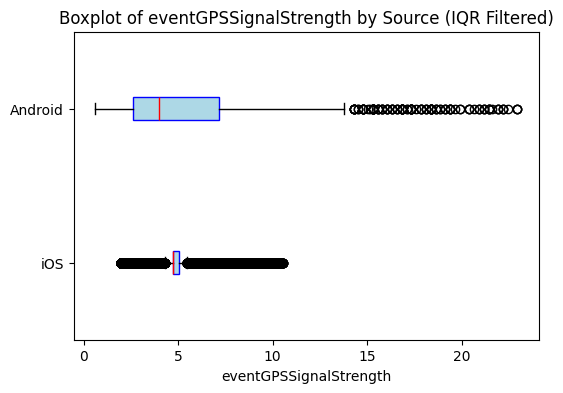

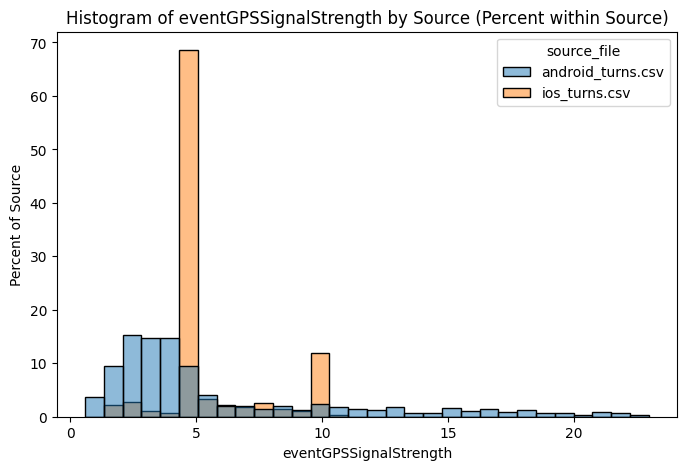

In [9]:
def iqr_filter(df, col, group_col):
    def filter_group(g):
        Q1 = g[col].quantile(0.25)
        Q3 = g[col].quantile(0.75)
        IQR = Q3 - Q1
        upper = Q3 + 1.5 * IQR
        return g[(g[col] <= upper)]
    
    return df.groupby(group_col, group_keys=False).apply(filter_group)

# Apply IQR filter
df_iqr = iqr_filter(df, "eventGPSSignalStrength", "source_file")

# Drop negatives
df_iqr = df_iqr[df_iqr["eventGPSSignalStrength"] >= 0]

plt.figure(figsize=(6,4))

# Split cleaned data
ios_data = df_iqr[df_iqr['is_ios'] == 1]['eventGPSSignalStrength']
android_data = df_iqr[df_iqr['is_ios'] == 0]['eventGPSSignalStrength']

# Boxplot
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"))
plt.title("Boxplot of eventGPSSignalStrength by Source (IQR Filtered)")
plt.xlabel("eventGPSSignalStrength")
plt.show()

# Histogram
plt.figure(figsize=(8,5))
sns.histplot(
    data=df_iqr, 
    x="eventGPSSignalStrength", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of eventGPSSignalStrength by Source (Percent within Source)")
plt.xlabel("eventGPSSignalStrength")
plt.ylabel("Percent of Source")
plt.show()

In [10]:
print(df_iqr.shape[0] / df.shape[0] * 100, "% of data retained after IQR filtering")
df = df_iqr.copy()
del df_iqr
df.shape

91.06939613023197 % of data retained after IQR filtering


(56810, 25)

In [11]:
df.groupby("source_file")["eventGPSSignalStrength"].describe()

,count,mean,std,min,25%,50%,75%,max
source_file,,,,,,,,
android_turns.csv,1148.0,5.905655,5.015432,0.590333,2.625184,3.984147,7.142857,22.959183
ios_turns.csv,55662.0,5.518636,1.974436,2.000000,4.739321,4.747437,5.031525,10.535765


In [12]:
df.groupby("source_file")["eventStartSpeed"].describe()

,count,mean,std,min,25%,50%,75%,max
source_file,,,,,,,,
android_turns.csv,1148.0,13.930049,8.691971,0.153224,8.031878,11.855412,17.051075,55.18693
ios_turns.csv,55662.0,15.372087,13.426513,-2.236940,8.314723,13.624814,20.138674,578.63660


In [13]:
df = df[~((df["is_ios"] == 1) & ((df["eventStartSpeed"] < 0) | (df["eventStartSpeed"] > 200)))]
df.groupby("source_file")["eventStartSpeed"].describe()

,count,mean,std,min,25%,50%,75%,max
source_file,,,,,,,,
android_turns.csv,1148.0,13.930049,8.691971,0.153224,8.031878,11.855412,17.051075,55.186930
ios_turns.csv,55639.0,15.180916,9.297290,0.000000,8.314043,13.620105,20.138674,101.549355


/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_64646/1638583846.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


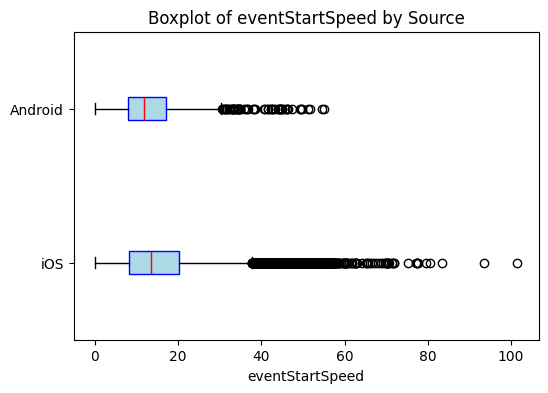

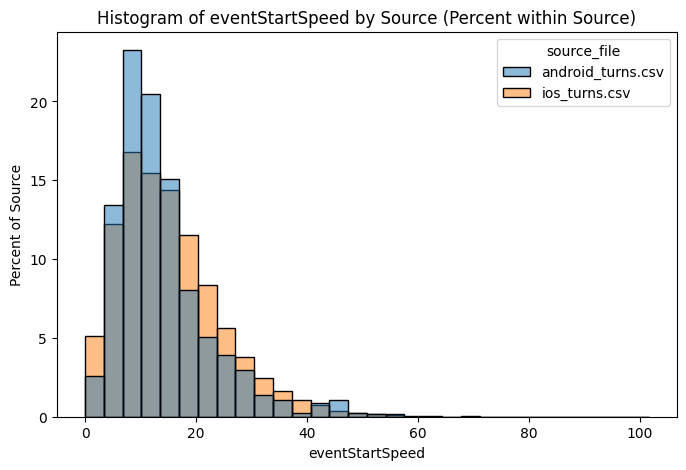

In [14]:
plt.figure(figsize=(6,4))

# Split cleaned data
ios_data = df[df['is_ios'] == 1]['eventStartSpeed']
android_data = df[df['is_ios'] == 0]['eventStartSpeed']

# Boxplot
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"))
plt.title("Boxplot of eventStartSpeed by Source")
plt.xlabel("eventStartSpeed")
plt.show()

# Histogram
plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="eventStartSpeed", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of eventStartSpeed by Source (Percent within Source)")
plt.xlabel("eventStartSpeed")
plt.ylabel("Percent of Source")
plt.show()

In [15]:
df.groupby("source_file")["eventEndSpeed"].describe()

,count,mean,std,min,25%,50%,75%,max
source_file,,,,,,,,
android_turns.csv,1148.0,16.849707,8.249606,0.022369,11.913225,16.041231,20.399112,54.74217
ios_turns.csv,55639.0,16.985755,8.095749,-2.236940,11.419626,15.769236,20.973166,101.88829


In [16]:
df = df.drop(df[(df["is_ios"] == 1) & (df["eventEndSpeed"] < 0)].index)
df.groupby("source_file")["eventEndSpeed"].describe()

,count,mean,std,min,25%,50%,75%,max
source_file,,,,,,,,
android_turns.csv,1148.0,16.849707,8.249606,0.022369,11.913225,16.041231,20.399112,54.74217
ios_turns.csv,55636.0,16.986791,8.094737,0.000000,11.419958,15.769908,20.973387,101.88829


/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_64646/3350277681.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


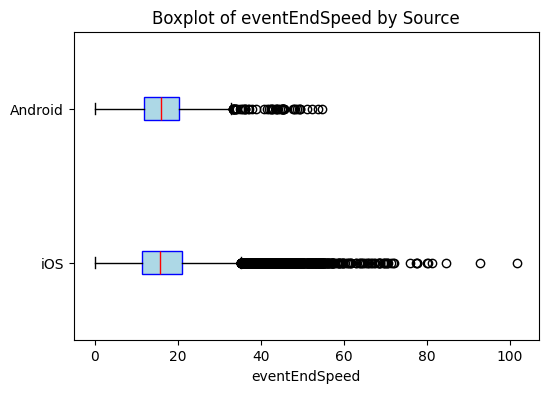

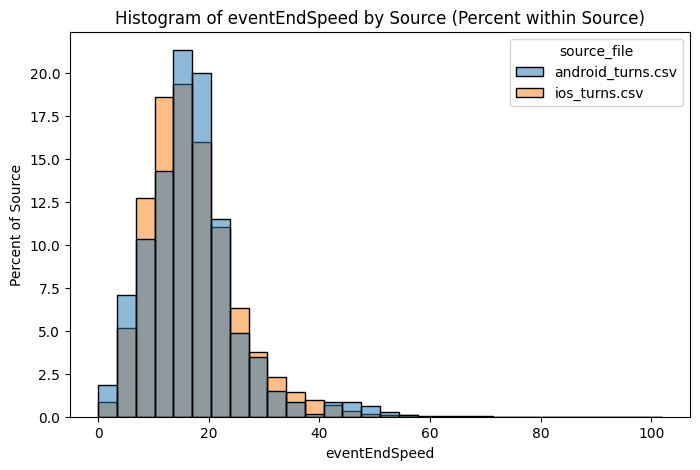

In [17]:
plt.figure(figsize=(6,4))

# Split cleaned data
ios_data = df[df['is_ios'] == 1]['eventEndSpeed']
android_data = df[df['is_ios'] == 0]['eventEndSpeed']

# Boxplot
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"))
plt.title("Boxplot of eventEndSpeed by Source")
plt.xlabel("eventEndSpeed")
plt.show()

# Histogram
plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="eventEndSpeed", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of eventEndSpeed by Source (Percent within Source)")
plt.xlabel("eventEndSpeed")
plt.ylabel("Percent of Source")
plt.show()

In [18]:
# to find aggressive driving patterns
print(df.shape)
df["speed_gap"] = (df["eventEndSpeed"] - df["eventStartSpeed"])
df[
    ((df["speed_gap"] > 15) & (df["eventDurationSeconds"] < 2)) |
    ((df["speed_gap"] < -30) & (df["eventDurationSeconds"] < 2))
]

(56784, 25)


,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,...,gpsMedianLateralAccel,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,speed_gap
283,1,ios_turns.csv,5.0,20.988516,0.962125,0.061531,0.0,8.337436,10.428450,31.548578,...,13.277531,13.277531,13.277531,104.889430,46.775880,121.992550,46.879425,3.675932,10.340366,21.120128
3681,1,ios_turns.csv,5.0,16.739193,1.962875,0.018757,0.0,4.779155,8.299278,24.880093,...,3.581340,5.900622,5.900622,29.211308,16.362083,90.616990,32.772167,42.530315,16.198338,16.580815
13220,1,ios_turns.csv,5.0,43.777966,1.945563,0.038562,0.0,4.664369,32.394820,55.840298,...,6.989507,14.733275,14.733275,16.297628,0.711307,90.000300,1.412134,355.278560,53.106950,23.445478
20518,1,ios_turns.csv,4.0,11.741309,0.962625,0.181729,0.0,7.345365,3.708069,19.774550,...,14.043683,14.043683,14.043683,184.840550,5.691554,199.889790,5.707117,26.641233,3.586060,16.066481
26094,1,ios_turns.csv,5.0,10.535987,0.922734,0.047426,0.0,4.590544,0.000000,21.071974,...,11.497326,11.497326,11.497326,151.579070,0.879614,265.169700,0.846939,646.682070,1.929397,21.071974
34228,1,ios_turns.csv,4.0,15.735013,0.954000,0.004212,0.0,6.000906,6.926472,24.543554,...,5.477482,5.477482,5.477482,42.686210,9.602603,99.140290,9.542587,54.338074,9.236859,17.617082
36972,1,ios_turns.csv,5.0,20.618885,1.958641,0.020089,0.0,4.749614,10.079371,29.614052,...,1.335058,5.298154,5.298154,14.082804,1.100452,44.559376,2.199378,565.648560,33.077990,19.534681
41239,1,ios_turns.csv,5.0,10.709437,1.948250,0.008382,0.0,8.001208,0.802309,23.587824,...,1.182740,5.765910,5.765910,26.136612,11.865771,103.810310,23.589275,39.031280,10.117114,22.785515
43104,1,ios_turns.csv,4.0,13.500791,1.967031,0.019883,0.0,4.744556,5.753271,26.033882,...,0.701935,15.837690,15.837690,43.576508,0.927674,101.353820,1.862004,2389.072500,9.423248,20.280611
58003,1,ios_turns.csv,4.0,24.784761,0.958133,0.044702,0.0,5.162546,12.563641,37.005882,...,8.001829,8.001829,8.001829,40.382370,0.110595,87.989270,0.110380,13454.991000,15.511997,24.442241


In [19]:
df["aggressive"] = (
    ((df["speed_gap"] > 15) & (df["eventDurationSeconds"] < 2)) |
    ((df["speed_gap"] < -30) & (df["eventDurationSeconds"] < 2))
).astype(int) # 1 if aggressive, 0 otherwise
df["aggressive"].value_counts()

aggressive
0    56773
1       11
Name: count, dtype: int64

/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_64646/3737890712.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


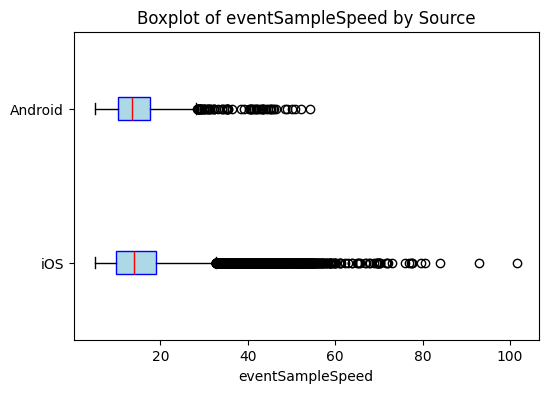

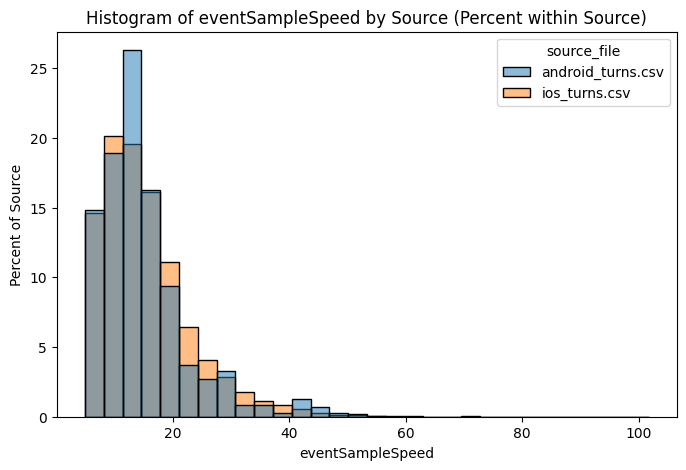

In [20]:
plt.figure(figsize=(6,4))

# Split cleaned data
ios_data = df[df['is_ios'] == 1]['eventSampleSpeed']
android_data = df[df['is_ios'] == 0]['eventSampleSpeed']

# Boxplot
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"))
plt.title("Boxplot of eventSampleSpeed by Source")
plt.xlabel("eventSampleSpeed")
plt.show()

# Histogram
plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="eventSampleSpeed", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of eventSampleSpeed by Source (Percent within Source)")
plt.xlabel("eventSampleSpeed")
plt.ylabel("Percent of Source")
plt.show()

In [21]:
df['eventDurationSeconds'].describe()

count    56784.000000
mean         5.012753
std          3.074691
min          0.914496
25%          2.976483
50%          4.703578
75%          6.176000
max         24.980251
Name: eventDurationSeconds, dtype: float64

/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_64646/601734456.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


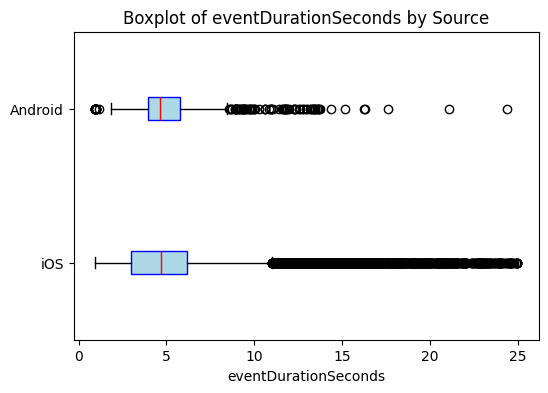

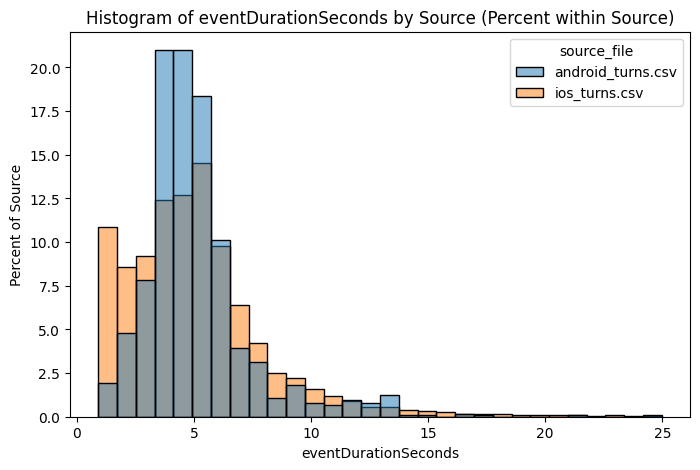

In [22]:
plt.figure(figsize=(6,4))

# Split cleaned data
ios_data = df[df['is_ios'] == 1]['eventDurationSeconds']
android_data = df[df['is_ios'] == 0]['eventDurationSeconds']

# Boxplot
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"))
plt.title("Boxplot of eventDurationSeconds by Source")
plt.xlabel("eventDurationSeconds")
plt.show()

# Histogram
plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="eventDurationSeconds", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of eventDurationSeconds by Source (Percent within Source)")
plt.xlabel("eventDurationSeconds")
plt.ylabel("Percent of Source")
plt.show()

In [23]:
df[df['eventDurationSeconds'] > 20].shape

(217, 27)

In [24]:
df['eventMilesDriven'].describe()

count    56784.000000
mean         0.022510
std          0.021703
min          0.000000
25%          0.010343
50%          0.017002
75%          0.027262
max          1.007121
Name: eventMilesDriven, dtype: float64

/var/folders/md/7qhzsnh55gzclxjx6wytnlh00000gn/T/ipykernel_64646/3507072358.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


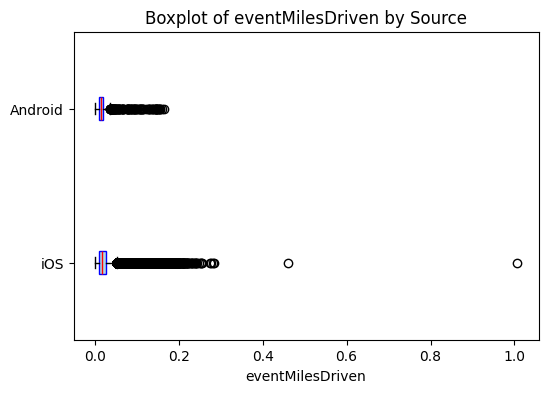

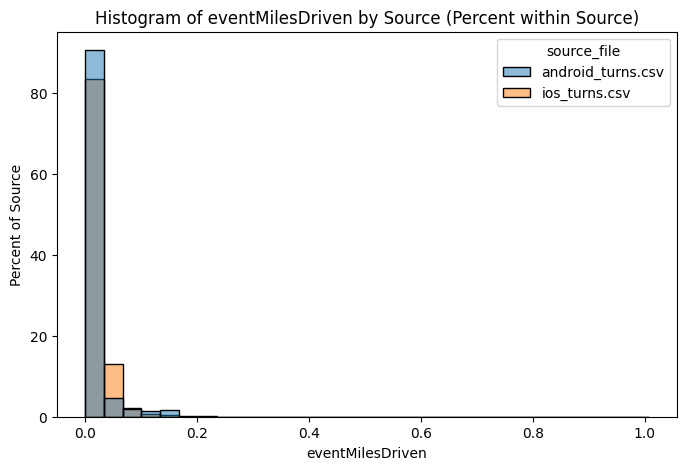

In [25]:
plt.figure(figsize=(6,4))

# Split cleaned data
ios_data = df[df['is_ios'] == 1]['eventMilesDriven']
android_data = df[df['is_ios'] == 0]['eventMilesDriven']

# Boxplot
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"))
plt.title("Boxplot of eventMilesDriven by Source")
plt.xlabel("eventMilesDriven")
plt.show()

# Histogram
plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="eventMilesDriven", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of eventMilesDriven by Source (Percent within Source)")
plt.xlabel("eventMilesDriven")
plt.ylabel("Percent of Source")
plt.show()

In [26]:
print(df.shape[0] / df_raw_size * 100, "% of data retained after cleaning")

91.02771677273529 % of data retained after cleaning


In [27]:
ios_clean = df[df["is_ios"] == 1]
android_clean = df[df["is_ios"] == 0]

In [28]:
# saving into cleaned csv file
ios_clean.to_csv(root / "data" / "processed" / "ios"/ "parent_clean.csv", index=False)
android_clean.to_csv(root / "data" / "processed" / "android"/ "parent_clean.csv", index=False)  
df.to_csv(root / "data" / "processed" / "merged"/ "parent_clean.csv", index=False) 

In [29]:
# YIPPEE!!!
print({df[df['eventSensorDetectionMthd'] == 0].shape})
print({df[df['eventSensorDetectionMthd'] == 1].shape})
print({df[df['eventSensorDetectionMthd'] == 2].shape})
print({df.shape})

{(20462, 27)}
{(7310, 27)}
{(29012, 27)}
{(56784, 27)}
